# Introduction to Machine Learning

In [1]:
#ตัวอย่างการเขียน Model

import matplotlib.pyplot as plt
import numpy as np

In [2]:
x_data = [1.0, 1.8, 3.0, 4.1, 5.2, 6.0]   
y_data = [1,1.3,2.2,2.5,2.8,3.6]

x = np.array(x_data)    #ทำให้เป็น Numpy Array
y = np.array(y_data)

In [3]:
x

array([1. , 1.8, 3. , 4.1, 5.2, 6. ])

In [4]:
y

array([1. , 1.3, 2.2, 2.5, 2.8, 3.6])

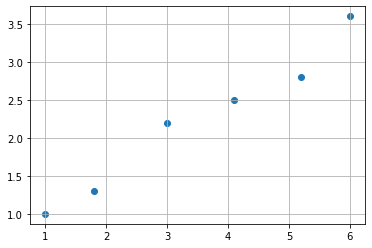

In [6]:
#ตรวจสอบข้อมูลด้วยกราฟก่อนสร้าง Model เพื่อดู trend หรือ คสพ.

plt.scatter(x, y)
plt.grid()
plt.show()

#มีแนวโน้มเป็น Linear Regression (เมื่อ x สูงขึ้น y จะสูงตาม แนวโน้มเป็นเส้นตรงแม้อาจจะไม่ตรงเป๊ะ 100%)

In [7]:
#ทำ Linear Regression
from sklearn.linear_model import LinearRegression

#ข้อมูลที่จะป้อนให้คอมพิวเตอร์เรียนรู้ เรียกว่า Data set หรือ Training set จะต้องเปลี่ยนให้เป็นรูปแบบเมทริกซ์ 1 คอลัมน์ (ตอนนี้ยังเป็น 1 แถว ไม่ใช่ 1 คอลัมน์)
#ใช้ .reshape(-1, 1) แยกเป็น x และ y

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [9]:
print(x)
print(y)

[[1. ]
 [1.8]
 [3. ]
 [4.1]
 [5.2]
 [6. ]]
[[1. ]
 [1.3]
 [2.2]
 [2.5]
 [2.8]
 [3.6]]


In [11]:
#เริ่มสร้าง Model แล้วทำการป้อนข้อมูลให้คอมพิวเตอร์เรียนรู้  ขั้นตอนนี้เรียกว่า Train

model = LinearRegression()      #เริ่มสร้าง Model (Instantiate)
model.fit(x, y)                #ป้อนข้อมูล x y ให้คอมพิวเตอร์เรียนรู้แล้วสร้าง Model ให้

LinearRegression()

In [14]:
#ตอนนี้เราได้ตัวแปร model ซึ่งก็คือ Model (ซึ่งเทียบเท่ากับสมการ y = mx + b)

#ตัวอย่างเช่น ต้องการหาว่า เมื่อลงทุน 2.5 ล้าน (x=2.5) จะมีกำไร(y)ประมาณเท่าใด
#ใช้ Model ที่เครื่องสร้างให้ทำการคำนวณ โดยข้อมูล input (x) จะต้องทำให้เป็น List ก่อน ด้วยการใส่วงเล็บเหลี่ยมสองชั้น [[]] เพราะ scikit-learn ต้องใส่ข้อมูลชุดไปเป็น input

model.predict([[2.5]])    #คำนวณหาผลลัพธ์

array([[1.73670696]])

In [15]:
#ผลลัพธ์ที่ได้จะคืนค่ากลับมาเป็น Array เมทริกซ์

#เมื่อลงทุน 2.5 ล้าน คาดว่าจะได้กำไร 1.736 ล้าน

#ในงาน ML การคำนวณหาผลลัพธ์จะใช้คำว่า Predict(ทำนาย) เพราะเป็นค่าที่ระบบคำนวณแล้วคาดการณ์ให้

In [17]:
#กรณีต้องการคำนวณหรือทำนายหลายค่า ให้กำหนดค่า x_input เป็น List คอลัมน์เดียวแบบเมทริกซ์ แล้วใช้ .predict 

x_input = [[2.0],
          [2.5],
          [3],
          [5.0]]
y_predict = model.predict(x_input)
y_predict

#จะได้ค่าเป็น array ตามจำนวน Input ที่ให้ทำนาย

array([[1.49246448],
       [1.73670696],
       [1.98094944],
       [2.95791935]])

In [21]:
#กรณีต้องการค่าเดี่ยว ให้ระบุตำแหน่ง index
y_predict[0][0]

1.492464484249537

In [20]:
y_predict[3][0]

2.9579193505691346

In [22]:
#การกำหนด x_input เมื่อมีหลายค่า อาจจะพิมพ์ยาก สามารถกำหนดเป็น list ก่อน แล้วใช้ .reshape ได้ 
x_input = [2.0,2.5,3,5.0]
x_input = np.array(x_input).reshape(-1, 1)     #np.array(ตัวแปร).reshape(-1, 1)
y_predict = model.predict(x_input)
y_predict

#ผลลัพธ์เหมือนกัน

array([[1.49246448],
       [1.73670696],
       [1.98094944],
       [2.95791935]])

In [24]:
#ตัวอย่างโค้ด วนรอบอ่านค่าแต่ละรายการมาแสดงผล ให้ดูสรุปง่ายขึ้น 

y2_predict = y_predict.reshape(1, -1) 
x_input_list = x_input

for i, item in enumerate(x_input_list):
    print('x={} y={:.5f} '.format(item[0], y2_predict[0][i]))

x=2.0 y=1.49246 
x=2.5 y=1.73671 
x=3.0 y=1.98095 
x=5.0 y=2.95792 


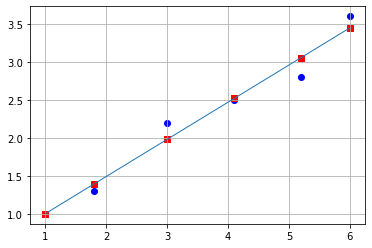

In [25]:
#ดูเส้นจากสมการ Model

prd = model.predict(x)            #หาค่า y (ทำนาย y) ทุกจุดที่ x เป็น Input

plt.grid()                        #แสดงเส้นกริดตาราง
plt.scatter(x, y, color='b')      #พล็อตจุด Data ของจริง กำหนดเป็นสีน้ำเงิน
plt.plot(x, prd, linewidth='1')   #พล็อตเส้นตรงที่เครื่องสร้าง Model ให้

#พล็อตจุดที่เครื่องทำนายให้ (s=จุดสี่เหลี่ยม square, (r=red))
plt.scatter(x, prd, color='r', marker='s')
plt.show()

#จุดสี่เหลี่ยมแดง คือจุดที่ได้จากการทำนาย (ได้จากการคำนวณ ทำนาย หรือ Predict โดยป้อนค่า x เป็น input เข้าไปทำนาย)

In [26]:
#ต้องการดูค่า m(slope) และ b(ค่าจุดตัด)
model.coef_       #ค่า slope

array([[0.48848496]])

In [27]:
model.intercept_  #ค่าจุดตัดของสมการเส้นตรง

array([0.51549457])

In [33]:
#การบันทึกและเรียกใช้งาน Model

#ปกติแล้ว กระบวนการ Train จะทำครั้งเดียว พอได้ Model ที่เหมาะสมแล้ว(ทดสอบประเมินประสิทธิภาพแล้ว) ก็ทำการเก็บไว้ใช้งาน (ไม่ต้องสร้างใหม่ทุกครั้ง)

#วิธีการเก็บ หมายถึงบันทึกเก็บเป็นไฟล์ข้อมูล สามารถทำได้หลายวิธี สำหรับในที่นี้จะกล่าวถึงการเก็บด้วย pickle โดยใช้ไลบรารี joblib 

import sklearn.externals as extjoblib
import joblib

#บันทึก Model เป็นไฟล์ชื่อ my_model.pkl
#model คือตัวแปรเก็บค่า Model ที่ได้จาก .fit() ซึ่งก็คือที่ได้จากขั้นตอนการ Train
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']

In [37]:
#การนำ Model มาใช้งานในโปรแกรม

import sklearn.externals as extjoblib
import joblib
import numpy as np

model = joblib.load('my_model.pkl')

In [38]:
#สมมติว่า input มีดังนี้

x_input = [2.0,2.5,3,5.0,5.5]
x_input = np.array(x_input).reshape(-1, 1)

y_predict = model.predict(x_input)
y_predict

array([[1.49246448],
       [1.73670696],
       [1.98094944],
       [2.95791935],
       [3.20216183]])